<a href="https://colab.research.google.com/github/Nouran-Khallaf/Arabic-Readability-Corpus/blob/main/genai_for_public_good.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Simplification Typology Classifier using mBert**





This NoteBook is deticated to explore the use of pre-trained transformer-based models for multiclass text classification. The primary focus is on predicting the appropriate simplification strategies required to simplify respective SE sentences.




---
> ### Load the data

----


In [1]:
!pip install gdown
!gdown "https://drive.google.com/uc?id=1z-SRYUL6bAHQ-vfP0AJgxMjpkCd-56iP"


Downloading...
From: https://drive.google.com/uc?id=1z-SRYUL6bAHQ-vfP0AJgxMjpkCd-56iP
To: /content/ri_annotated_texts_final.csv
100% 76.8k/76.8k [00:00<00:00, 145MB/s]


In [2]:
import pandas as pd
file_path = 'ri_annotated_texts_final.csv'
data = pd.read_csv(file_path)



---




> ### Data Exploration and Analysis





---



In [3]:
# Display basic information and first few rows
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370 entries, 0 to 369
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Version initiale   370 non-null    object
 1   Version retraitée  370 non-null    object
 2   Catégorie          370 non-null    object
dtypes: object(3)
memory usage: 8.8+ KB


In [4]:
# Display the first few rows of the dataset
data.head()

,Version initiale,Version retraitée,Catégorie
0,Dispositif d'apprentissage du français : perme...,Des ateliers 2 fois par semaine pour progresse...,Explanation
1,Dispositif d'apprentissage du français : perme...,Des ateliers 2 fois par semaine pour progresse...,Explanation
2,Dispositif d'apprentissage du français : perme...,"Des ateliers pour progresser en français, mieu...",Substitution
3,Dispositif d'apprentissage du français : perme...,"Des ateliers pour progresser en français, mieu...",Compression
4,Dispositif d'apprentissage du français : perme...,"Des ateliers pour progresser en français, mieu...",Syntactic




```
load important libiraries for visualisation
```



In [5]:
!pip install seaborn wordcloud ace_tools

In [6]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud



> Distribution of Simplification Strategies



In [7]:
# Plotly bar chart for distribution of categories
fig = px.bar(data['Catégorie'].value_counts().reset_index(),
             x='Catégorie',
             y='count',
             labels={'Catégorie': 'Simplification Strategy', 'count': 'Count'},  # Updated labels
             title='Distribution of Simplification Strategies')
fig.show()



> Text Length Analysis



In [8]:
data['Initial_Length'] = data['Version initiale'].apply(len)
data['Retraited_Length'] = data['Version retraitée'].apply(len)

# Plotly histogram for text length comparison
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['Initial_Length'], name='Original Text Length', opacity=0.6))
fig.add_trace(go.Histogram(x=data['Retraited_Length'], name='Simplified Text Length', opacity=0.6))
fig.update_layout(title='Distribution of Text Lengths Before and After Simplification',
                  xaxis_title='Text Length', yaxis_title='Frequency',
                  barmode='overlay')
fig.show()



> Word Frequency Analysis



In [9]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('french'))

def get_most_common_words(text_series, n=20):
    words = ' '.join(text_series).lower()
    words = nltk.word_tokenize(words)
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return Counter(words).most_common(n)

# Display top words
print("Top words in Original Text:", get_most_common_words(data['Version initiale']))
print("Top words in Simplified Text:", get_most_common_words(data['Version retraitée']))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Top words in Original Text: [('français', 67), ('travail', 36), ('formation', 29), ('comprendre', 25), ('france', 22), ('ateliers', 21), ('vie', 21), ('langue', 20), ('accompagnement', 20), ('cours', 19), ('faire', 19), ('professionnelle', 18), ('apprendre', 18), ('démarches', 18), ('savoir', 15), ('niveau', 15), ('besoins', 15), ('mail', 14), ('personnes', 14), ('vocabulaire', 13)]
Top words in Simplified Text: [('français', 62), ('travail', 59), ('apprendre', 39), ('trouver', 35), ('formation', 30), ('comprendre', 28), ('être', 28), ('démarches', 27), ('mieux', 25), ('ateliers', 24), ('faire', 24), ('professionnel', 23), ('connaître', 23), ('pouvez', 23), ('niveau', 23), ('communiquer', 22), ('accompagnement', 21), ('mail', 20), ('savoir', 19), ('prendre', 19)]


In [10]:
# Get top words and their frequencies
original_top_words = get_most_common_words(data['Version initiale'])
simplified_top_words = get_most_common_words(data['Version retraitée'])

# Convert to DataFrame for better visualization
df_words = pd.DataFrame({
    "Word (Original)": [word for word, _ in original_top_words],
    "Frequency (Original)": [freq for _, freq in original_top_words],
    "Word (Simplified)": [word for word, _ in simplified_top_words],
    "Frequency (Simplified)": [freq for _, freq in simplified_top_words],
})

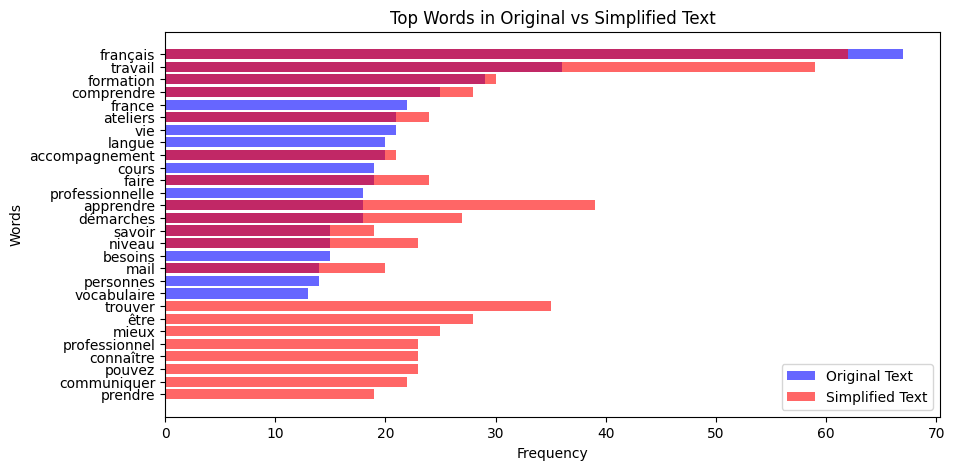

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
ax.barh([word for word, _ in original_top_words], [freq for _, freq in original_top_words], color='blue', alpha=0.6, label="Original Text")
ax.barh([word for word, _ in simplified_top_words], [freq for _, freq in simplified_top_words], color='red', alpha=0.6, label="Simplified Text")

ax.set_xlabel("Frequency")
ax.set_ylabel("Words")
ax.set_title("Top Words in Original vs Simplified Text")
ax.legend()

plt.gca().invert_yaxis()
plt.show()



> Add blockquote



In [12]:
import pandas as pd

# Ensure the relevant columns are present
assert 'Version initiale' in data.columns and 'Version retraitée' in data.columns, "Required columns missing."

# Calculate sentence lengths (number of words per sentence) for complex and simple texts
data['Standard_Length'] = data['Version initiale'].str.split().str.len()
data['E2R_Length'] = data['Version retraitée'].str.split().str.len()

# Calculate total number of words in each column
total_words_complex = data['Standard_Length'].sum()
total_words_simple = data['E2R_Length'].sum()

# Compute ranges and interquartile ranges for "Complex" (Version initiale) texts
complex_q1 = data['Standard_Length'].quantile(0.25)
complex_q3 = data['Standard_Length'].quantile(0.75)
complex_iqr = complex_q3 - complex_q1

# Compute ranges and interquartile ranges for "Simple" (E2R version) texts
simple_q1 = data['E2R_Length'].quantile(0.25)
simple_q3 = data['E2R_Length'].quantile(0.75)
simple_iqr = simple_q3 - simple_q1

# Display the results
print("Complex Texts (Version initiale):")
print(f"Total Number of Words: {total_words_complex}")
print(f"Range at 25th Percentile (Q1): {complex_q1} words")
print(f"Range at 75th Percentile (Q3): {complex_q3} words")
print(f"IQR: {complex_iqr} words\n")

print("Simplified Texts (Version retraitée):")
print(f"Total Number of Words: {total_words_simple}")
print(f"Range at 25th Percentile (Q1): {simple_q1} words")
print(f"Range at 75th Percentile (Q3): {simple_q3} words")
print(f"IQR: {simple_iqr} words")

Complex Texts (Version initiale):
Total Number of Words: 5005
Range at 25th Percentile (Q1): 6.0 words
Range at 75th Percentile (Q3): 19.0 words
IQR: 13.0 words

Simplified Texts (Version retraitée):
Total Number of Words: 5647
Range at 25th Percentile (Q1): 7.0 words
Range at 75th Percentile (Q3): 20.0 words
IQR: 13.0 words


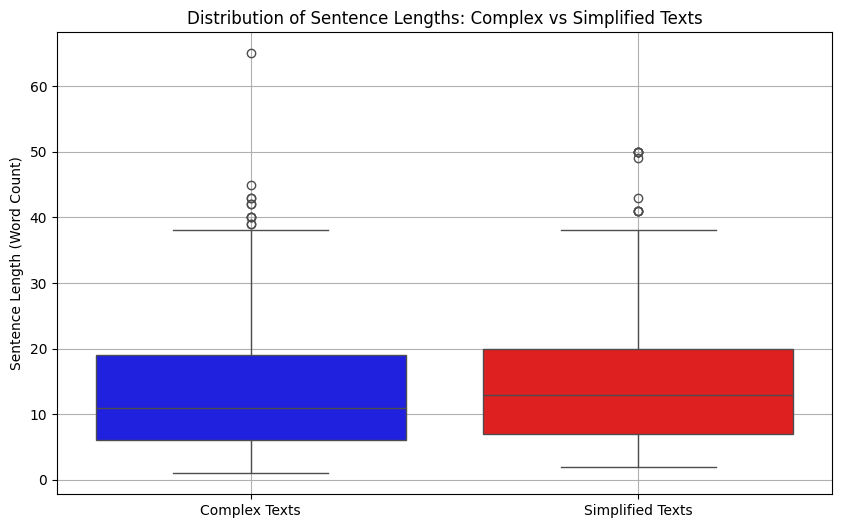

In [13]:
import seaborn as sns

# Enhanced visualization with boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Standard_Length', 'E2R_Length']], palette=["blue", "red"])
plt.xticks(ticks=[0, 1], labels=["Complex Texts", "Simplified Texts"])
plt.ylabel("Sentence Length (Word Count)")
plt.title("Distribution of Sentence Lengths: Complex vs Simplified Texts")
plt.grid(True)
plt.show()




---



> ### Install Hugging Face Transformers and Datasets library

---

In [14]:
!pip install transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [15]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
)
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from torch.utils.data import WeightedRandomSampler




---


> Data Prepration


---




In [16]:
# Prepare the dataset
data = data.dropna(subset=['Version initiale', 'Version retraitée', 'Catégorie'])  # Drop rows with missing values
X = data[['Version initiale', 'Version retraitée']].values  # Both text inputs
y = data['Catégorie'].tolist()

# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Combine Standard French and E2R version with a separator
def combine_texts(row):
    return f"Standard French: {row[0]} [SEP] E2R Version: {row[1]}"

X_combined = [combine_texts(row) for row in X]

# Train-test split
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    X_combined, y_encoded, test_size=0.2, random_state=42
)

# Train-test split
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_typologies, val_typologies = train_test_split(
    X_combined, y, test_size=0.2, random_state=42
)

# Show dataset statistics
print(f"Training samples: {len(train_texts)}")
print(f"Validation samples: {len(val_texts)}")

Training samples: 296
Validation samples: 74




---



> Fine-tune the Model


---



row: "Standard French: {row['Version initiale']} [SEP] Easy-to-Read: {row['Version retraitée']}"

In [25]:
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding,
    pipeline
)
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Combine "Standard English" and "E2R Version" for input
data['Combined Text'] = data.apply(
    lambda row: f"Standard French: {row['Version initiale']} [SEP] Easy-to-Read: {row['Version retraitée']}", axis=1
)
data = data.dropna(subset=['Combined Text', 'Catégorie'])

# Encode Typologies
label_encoder = LabelEncoder()
data['Typology Encoded'] = label_encoder.fit_transform(data['Catégorie'])

# Step 3: Handle Class Imbalance with Augmentation
underrepresented_classes = data['Catégorie'].value_counts().tail(3).index.tolist()
paraphraser = pipeline("text2text-generation", model="t5-small", device=0 if torch.cuda.is_available() else -1)

def augment_text(text):
    augmented = paraphraser(text, max_length=100, num_return_sequences=1)
    return augmented[0]['generated_text']

augmented_data = []
for typology in underrepresented_classes:
    class_data = data[data['Catégorie'] == typology]
    for _, row in class_data.iterrows():
        augmented_text = augment_text(row['Combined Text'])
        augmented_data.append({'Combined Text': augmented_text, 'Typology': typology})

# Append augmented data
augmented_df = pd.DataFrame(augmented_data)
data = pd.concat([data, augmented_df], ignore_index=True)

# Encode Typologies Again (Post-Augmentation)
data['Typology Encoded'] = label_encoder.fit_transform(data['Catégorie'])

# Step 4: Prepare Models and Loop Over Them
models_to_test = [

    "bert-base-multilingual-cased",

]


all_model_results = []
skf = StratifiedKFold(n_splits=5)
for model_name in models_to_test:
    print(f"\nStarting model: {model_name}")


    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=len(label_encoder.classes_)
    )

    fold_metrics = []

    for fold, (train_index, val_index) in enumerate(skf.split(data['Combined Text'], data['Typology Encoded'])):
        print(f"\nStarting Fold {fold + 1} for {model_name}")

        # Split Data
        train_texts, val_texts = data['Combined Text'].iloc[train_index], data['Combined Text'].iloc[val_index]
        train_labels, val_labels = data['Typology Encoded'].iloc[train_index], data['Typology Encoded'].iloc[val_index]

        def tokenize_function(texts):
            return tokenizer(list(texts), padding=True, truncation=True, max_length=512)

        train_encodings = tokenize_function(train_texts)
        val_encodings = tokenize_function(val_texts)

        train_labels = torch.tensor(train_labels.values, dtype=torch.long)
        val_labels = torch.tensor(val_labels.values, dtype=torch.long)

        class Dataset(torch.utils.data.Dataset):
            def __init__(self, encodings, labels):
                self.encodings = encodings
                self.labels = labels

            def __len__(self):
                return len(self.labels)

            def __getitem__(self, idx):
                item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
                item['labels'] = self.labels[idx]
                return item

        train_dataset = Dataset(train_encodings, train_labels)
        val_dataset = Dataset(val_encodings, val_labels)

        # Training Arguments
        training_args = TrainingArguments(
            output_dir=f"./results/{model_name}_fold_{fold}",
            evaluation_strategy="epoch",
            save_strategy="epoch",
            learning_rate=5e-5,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            num_train_epochs=3,
            weight_decay=0.01,
            logging_dir=f"./logs/{model_name}_fold_{fold}",
            save_total_limit=2,
            load_best_model_at_end=True,

        )

        # Define Metrics
        def compute_metrics(pred):
            predictions = pred.predictions.argmax(-1)
            labels = pred.label_ids
            precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
            acc = accuracy_score(labels, predictions)
            return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

        data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=val_dataset,
            data_collator=data_collator,
            compute_metrics=compute_metrics
        )

        # Train and Evaluate
        trainer.train()
        evaluation_results = trainer.evaluate()
        print(f"Fold {fold + 1} Results for {model_name}: {evaluation_results}")

        # Collect metrics for the fold
        fold_metrics.append(evaluation_results)



    # Calculate average metrics across folds
    avg_accuracy = sum([m['eval_accuracy'] for m in fold_metrics]) / len(fold_metrics)
    avg_f1 = sum([m['eval_f1'] for m in fold_metrics]) / len(fold_metrics)
    avg_precision = sum([m['eval_precision'] for m in fold_metrics]) / len(fold_metrics)
    avg_recall = sum([m['eval_recall'] for m in fold_metrics]) / len(fold_metrics)



    # Add to final model results
    all_model_results.append({
        "Model": model_name,
        "Avg_Accuracy": avg_accuracy,
        "Avg_F1": avg_f1,
        "Avg_Precision": avg_precision,
        "Avg_Recall": avg_recall
    })

      # Save Model and Tokenizer
    model.save_pretrained(f"./{model_name}_Combined")
    tokenizer.save_pretrained(f"./{model_name}__Combined")

# Step 3: Print Final Table of Results
import pandas as pd
results_df = pd.DataFrame(all_model_results)
print("\nFinal Results Across Models:")
print(results_df.to_string(index=False))

Device set to use cuda:0



Starting model: bert-base-multilingual-cased


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead




Starting Fold 1 for bert-base-multilingual-cased


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,2.054314,0.246914,0.141548,0.110288,0.246914
2,No log,1.847518,0.358025,0.237353,0.184753,0.358025
3,No log,1.800055,0.345679,0.205163,0.152189,0.345679


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



Fold 1 Results for bert-base-multilingual-cased: {'eval_loss': 1.800054907798767, 'eval_accuracy': 0.345679012345679, 'eval_f1': 0.20516254055348704, 'eval_precision': 0.15218919108862183, 'eval_recall': 0.345679012345679, 'eval_runtime': 0.2182, 'eval_samples_per_second': 371.159, 'eval_steps_per_second': 27.493, 'epoch': 3.0}

Starting Fold 2 for bert-base-multilingual-cased


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.799069,0.320988,0.221397,0.245125,0.320988
2,No log,1.923491,0.283951,0.241710,0.295855,0.283951
3,No log,1.801745,0.308642,0.253807,0.220281,0.308642


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



Fold 2 Results for bert-base-multilingual-cased: {'eval_loss': 1.7990692853927612, 'eval_accuracy': 0.32098765432098764, 'eval_f1': 0.22139738772589018, 'eval_precision': 0.2451252451252451, 'eval_recall': 0.32098765432098764, 'eval_runtime': 0.2906, 'eval_samples_per_second': 278.74, 'eval_steps_per_second': 20.647, 'epoch': 3.0}

Starting Fold 3 for bert-base-multilingual-cased


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.491318,0.456790,0.396485,0.422381,0.456790
2,No log,1.382222,0.469136,0.397202,0.447093,0.469136
3,No log,1.345839,0.493827,0.430720,0.436606,0.493827


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



Fold 3 Results for bert-base-multilingual-cased: {'eval_loss': 1.3458391427993774, 'eval_accuracy': 0.49382716049382713, 'eval_f1': 0.4307196723570993, 'eval_precision': 0.43660591808739957, 'eval_recall': 0.49382716049382713, 'eval_runtime': 0.2828, 'eval_samples_per_second': 286.409, 'eval_steps_per_second': 21.215, 'epoch': 3.0}

Starting Fold 4 for bert-base-multilingual-cased


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.375960,0.481481,0.428756,0.425412,0.481481
2,No log,1.233235,0.530864,0.477505,0.468294,0.530864
3,No log,1.180237,0.567901,0.516708,0.490921,0.567901


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



Fold 4 Results for bert-base-multilingual-cased: {'eval_loss': 1.1802371740341187, 'eval_accuracy': 0.5679012345679012, 'eval_f1': 0.5167084791267798, 'eval_precision': 0.49092085011625247, 'eval_recall': 0.5679012345679012, 'eval_runtime': 0.2735, 'eval_samples_per_second': 296.132, 'eval_steps_per_second': 21.936, 'epoch': 3.0}

Starting Fold 5 for bert-base-multilingual-cased


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.000994,0.625000,0.594786,0.581442,0.625000
2,No log,1.100480,0.575000,0.547879,0.569893,0.575000
3,No log,1.059700,0.625000,0.610855,0.634246,0.625000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Fold 5 Results for bert-base-multilingual-cased: {'eval_loss': 1.0009944438934326, 'eval_accuracy': 0.625, 'eval_f1': 0.594785987565758, 'eval_precision': 0.5814418158567775, 'eval_recall': 0.625, 'eval_runtime': 0.2176, 'eval_samples_per_second': 367.623, 'eval_steps_per_second': 22.976, 'epoch': 3.0}

Final Results Across Models:
                       Model  Avg_Accuracy   Avg_F1  Avg_Precision  Avg_Recall
bert-base-multilingual-cased      0.470679 0.393755       0.381257    0.470679


In [26]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer
import numpy as np
from sklearn.metrics import classification_report

# Load the saved model and tokenizer
saved_model_path = "./bert-base-multilingual-cased_Combined"
model = AutoModelForSequenceClassification.from_pretrained(saved_model_path)
tokenizer = AutoTokenizer.from_pretrained(saved_model_path)

# Reinitialize the Trainer with the loaded model
trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

# Evaluate the model
trainer.evaluate()

# Make predictions
predictions = trainer.predict(val_dataset)

# Decode predicted labels
predicted_labels = np.argmax(predictions.predictions, axis=1)

from sklearn.metrics import classification_report
import numpy as np

# Decode predicted labels
predictions = trainer.predict(val_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Debugging output
print("Predicted classes:", len(np.unique(predicted_labels)))
print("Label Encoder classes:", len(label_encoder.classes_))


all_labels = list(range(len(label_encoder.classes_)))
target_names = label_encoder.classes_

# Print the classification report
print(classification_report(
    val_labels,
    predicted_labels,
    labels=all_labels,
    target_names=target_names,
    zero_division=0
))

OSError: Can't load tokenizer for './bert-base-multilingual-cased_Combined'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure './bert-base-multilingual-cased_Combined' is the correct path to a directory containing all relevant files for a BertTokenizerFast tokenizer.



> Only Complex


In [19]:
import pandas as pd
import torch
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding,
    EarlyStoppingCallback
)
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import wandb

data = data.dropna(subset=['Version initiale', 'Catégorie'])
data['Typology'] = data['Catégorie'].str.replace("\xa0", "").str.replace(" ", "")  # Remove non-breaking spaces and regular spaces from the Typology column
from transformers import pipeline

paraphraser = pipeline("text2text-generation", model="t5-small")

underrepresented_classes = data['Catégorie'].value_counts().tail(3).index.tolist()
paraphraser = pipeline("text2text-generation", model="t5-small")

def augment_text(text):
    augmented = paraphraser(text, max_length=100, num_return_sequences=1)
    return augmented[0]['generated_text']

# Apply paraphrasing
augmented_data = []
for typology in underrepresented_classes:
    class_data = data[data['Typology'] == typology]
    for _, row in class_data.iterrows():
        augmented_text = augment_text(row['Version initiale'])
        augmented_data.append({'Version initiale': augmented_text, 'Typology': typology})

# Append augmented data
augmented_df = pd.DataFrame(augmented_data)
data = pd.concat([data, augmented_df], ignore_index=True)


# Encode Typologies
label_encoder = LabelEncoder()
data['Typology Encoded'] = label_encoder.fit_transform(data['Typology'])

# Calculate class weights
class_counts = data['Typology Encoded'].value_counts()
class_weights = torch.tensor([1.0 / count * len(data) / 2.0 for count in class_counts])






# Prepare Models and Loop Over Them
models_to_test = [

    "bert-base-multilingual-cased",

]

all_model_results = []
skf = StratifiedKFold(n_splits=5)
detailed_results = []  # Collect per-fold and per-epoch results
aggregated_summary = []  # Aggregated summary for each model

# Define a Custom Trainer to Incorporate Class Weights
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights.to(logits.device))  # Use class weights
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

# Initialize WANDB project for each model
for model_name in models_to_test:

    print(f"\nStarting model: {model_name}")

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=len(label_encoder.classes_)
    )

    fold_metrics = []
    model_start_time = time.time()

    for fold, (train_index, val_index) in enumerate(skf.split(data['Version initiale'], data['Typology Encoded'])):
        print(f"\nStarting Fold {fold + 1} for {model_name}")

        # Split Data
        train_texts, val_texts = data['Version initiale'].iloc[train_index], data['Version initiale'].iloc[val_index]
        train_labels, val_labels = data['Typology Encoded'].iloc[train_index], data['Typology Encoded'].iloc[val_index]

        def tokenize_function(texts):
            return tokenizer(list(texts), padding=True, truncation=True, max_length=512)

        train_encodings = tokenize_function(train_texts)
        val_encodings = tokenize_function(val_texts)

        train_labels = torch.tensor(train_labels.values, dtype=torch.long)
        val_labels = torch.tensor(val_labels.values, dtype=torch.long)

        class Dataset(torch.utils.data.Dataset):
            def __init__(self, encodings, labels):
                self.encodings = encodings
                self.labels = labels

            def __len__(self):
                return len(self.labels)

            def __getitem__(self, idx):
                item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
                item['labels'] = self.labels[idx]
                return item

        train_dataset = Dataset(train_encodings, train_labels)
        val_dataset = Dataset(val_encodings, val_labels)

        # Training Arguments
        training_args = TrainingArguments(
            output_dir=f"./results/{model_name}_fold_{fold}",
            evaluation_strategy="epoch",
            save_strategy="epoch",
            learning_rate=5e-6,
            per_device_train_batch_size=8,
            per_device_eval_batch_size=8,
            num_train_epochs=5,  # High number; EarlyStopping will handle stopping
            weight_decay=0.01,
            logging_dir=f"./logs/{model_name}_fold_{fold}",
            save_total_limit=2,
            load_best_model_at_end=True,
            gradient_accumulation_steps=1,
            fp16=True,
            gradient_checkpointing=True,
            max_grad_norm=1.0  # Gradient clipping
        )

        # Define Metrics
        def compute_metrics(pred):
            predictions = pred.predictions.argmax(-1)
            labels = pred.label_ids
            precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
            accuracy = accuracy_score(labels, predictions)
            return {
                "eval_precision": precision,
                "eval_recall": recall,
                "eval_f1": f1,
                "eval_accuracy": accuracy
            }

        data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
        trainer = CustomTrainer(
            model=model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=val_dataset,
            data_collator=data_collator,
            compute_metrics=compute_metrics,
            callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # Early stopping
        )

        # Train and Evaluate
        trainer.train()
        for epoch in range(int(trainer.state.epoch)):  # Collect metrics per epoch
            epoch_results = trainer.evaluate()
            epoch_results.update({"Model": model_name, "Fold": fold + 1, "Epoch": epoch + 1})
            detailed_results.append(epoch_results)

        evaluation_results = trainer.evaluate()
        print(f"Fold {fold + 1} Results for {model_name}: {evaluation_results}")

        # Collect metrics for the fold
        fold_metrics.append(evaluation_results)

    # Calculate average metrics across folds
    avg_precision = sum([m['eval_precision'] for m in fold_metrics]) / len(fold_metrics)
    avg_recall = sum([m['eval_recall'] for m in fold_metrics]) / len(fold_metrics)
    avg_f1 = sum([m['eval_f1'] for m in fold_metrics]) / len(fold_metrics)
    avg_accuracy = sum([m['eval_accuracy'] for m in fold_metrics]) / len(fold_metrics)

    # Calculate training time
    model_training_time = time.time() - model_start_time



    # Add to final model results
    all_model_results.append({
        "Model": model_name,
        "Avg_Precision": avg_precision,
        "Avg_Recall": avg_recall,
        "Avg_F1": avg_f1,
        "Avg_Accuracy": avg_accuracy,
        "Training_Time_Seconds": model_training_time
    })


    # Add aggregated summary for this model
    aggregated_summary.append({
        "Model": model_name,
        "Avg_Precision": avg_precision,
        "Avg_Recall": avg_recall,
        "Avg_F1": avg_f1,
        "Avg_Accuracy": avg_accuracy,
        "Training_Time_Seconds": model_training_time
    })

    # Save Model and Tokenizer
    model.save_pretrained(f"./{model_name}_complex")
    tokenizer.save_pretrained(f"./{model_name}_complex")

# Create a DataFrame for final results
final_results_df = pd.DataFrame(all_model_results)
final_results_df.to_csv("complex_model_results.csv", index=False)
print("\nFinal Results Across Models:")
print(final_results_df)

# Create a DataFrame for detailed results
detailed_results_df = pd.DataFrame(detailed_results)
detailed_results_df.to_csv("Complex_detailed_model_results.csv", index=False)
print("\nDetailed Results Per Fold and Epoch:")
print(detailed_results_df)

# Create a DataFrame for aggregated summary
aggregated_summary_df = pd.DataFrame(aggregated_summary)
aggregated_summary_df.to_csv("Complex_aggregated_model_summary.csv", index=False)
print("\nAggregated Summary for Each Model:")
print(aggregated_summary_df)


<ipython-input-19-2a92e2d71630>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

Device set to use cuda:0
Device set to use cuda:0



Starting model: bert-base-multilingual-cased


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead




Starting Fold 1 for bert-base-multilingual-cased


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,2.084089,0.054549,0.172840,0.082878,0.172840
2,No log,2.024447,0.063054,0.172840,0.088599,0.172840
3,No log,1.981542,0.115998,0.185185,0.114888,0.185185
4,No log,1.967955,0.104328,0.172840,0.106447,0.172840
5,No log,1.963287,0.102136,0.172840,0.105778,0.172840


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Fold 1 Results for bert-base-multilingual-cased: {'eval_precision': 0.10213612735542558, 'eval_recall': 0.1728395061728395, 'eval_f1': 0.1057784372285314, 'eval_accuracy': 0.1728395061728395, 'eval_loss': 1.963287353515625, 'eval_runtime': 0.198, 'eval_samples_per_second': 409.03, 'eval_steps_per_second': 55.547, 'epoch': 5.0}

Starting Fold 2 for bert-base-multilingual-cased


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,1.830520,0.174027,0.271605,0.178442,0.271605
2,No log,1.826236,0.158192,0.296296,0.198555,0.296296
3,No log,1.825400,0.182200,0.320988,0.216412,0.320988
4,No log,1.815696,0.182200,0.320988,0.216412,0.320988
5,No log,1.808623,0.182200,0.320988,0.216412,0.320988


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Fold 2 Results for bert-base-multilingual-cased: {'eval_precision': 0.18219977028610346, 'eval_recall': 0.32098765432098764, 'eval_f1': 0.21641238090617415, 'eval_accuracy': 0.32098765432098764, 'eval_loss': 1.80862295627594, 'eval_runtime': 0.1897, 'eval_samples_per_second': 427.004, 'eval_steps_per_second': 57.988, 'epoch': 5.0}

Starting Fold 3 for bert-base-multilingual-cased


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,1.667073,0.332384,0.271605,0.212077,0.271605
2,No log,1.659485,0.352182,0.296296,0.245779,0.296296
3,No log,1.628330,0.266896,0.296296,0.227520,0.296296
4,No log,1.617877,0.234774,0.271605,0.207872,0.271605
5,No log,1.616651,0.221698,0.283951,0.210712,0.283951


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Fold 3 Results for bert-base-multilingual-cased: {'eval_precision': 0.22169761320864884, 'eval_recall': 0.2839506172839506, 'eval_f1': 0.21071202413864415, 'eval_accuracy': 0.2839506172839506, 'eval_loss': 1.6166505813598633, 'eval_runtime': 0.1782, 'eval_samples_per_second': 454.645, 'eval_steps_per_second': 61.742, 'epoch': 5.0}

Starting Fold 4 for bert-base-multilingual-cased


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,1.505195,0.344860,0.395062,0.299426,0.395062
2,No log,1.444670,0.414663,0.456790,0.362122,0.456790
3,No log,1.474819,0.363472,0.419753,0.316370,0.419753
4,No log,1.465091,0.362576,0.419753,0.315573,0.419753
5,No log,1.456193,0.400157,0.432099,0.336861,0.432099


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Fold 4 Results for bert-base-multilingual-cased: {'eval_precision': 0.414662943366647, 'eval_recall': 0.4567901234567901, 'eval_f1': 0.36212232550905316, 'eval_accuracy': 0.4567901234567901, 'eval_loss': 1.4446702003479004, 'eval_runtime': 0.2052, 'eval_samples_per_second': 394.794, 'eval_steps_per_second': 53.614, 'epoch': 5.0}

Starting Fold 5 for bert-base-multilingual-cased


Epoch,Training Loss,Validation Loss,Precision,Recall,F1,Accuracy
1,No log,1.434955,0.392433,0.387500,0.334718,0.387500
2,No log,1.414453,0.410817,0.437500,0.367286,0.437500
3,No log,1.388637,0.622763,0.475000,0.407633,0.475000
4,No log,1.377129,0.569940,0.475000,0.418483,0.475000
5,No log,1.367729,0.570668,0.475000,0.423909,0.475000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/p

Fold 5 Results for bert-base-multilingual-cased: {'eval_precision': 0.5706681034482759, 'eval_recall': 0.475, 'eval_f1': 0.4239088811015953, 'eval_accuracy': 0.475, 'eval_loss': 1.3677294254302979, 'eval_runtime': 0.1777, 'eval_samples_per_second': 450.121, 'eval_steps_per_second': 56.265, 'epoch': 5.0}

Final Results Across Models:
                          Model  Avg_Precision  Avg_Recall    Avg_F1  \
0  bert-base-multilingual-cased       0.298273    0.341914  0.263787   

   Avg_Accuracy  Training_Time_Seconds  
0      0.341914             321.766876  

Detailed Results Per Fold and Epoch:
    eval_precision  eval_recall   eval_f1  eval_accuracy  eval_loss  \
0         0.102136     0.172840  0.105778       0.172840   1.963287   
1         0.102136     0.172840  0.105778       0.172840   1.963287   
2         0.102136     0.172840  0.105778       0.172840   1.963287   
3         0.102136     0.172840  0.105778       0.172840   1.963287   
4         0.102136     0.172840  0.105778    

row: "Standard French: {row['Version initiale']} [SEP] Easy-to-Read: {row['Version retraitée']}"


In [21]:
import pandas as pd
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding
)
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Combine "Standard English" and "E2R Version" for input
data['Combined Text'] = data.apply(
    lambda row: f"Standard French: {row['Version initiale']} [SEP] Easy-to-Read: {row['Version retraitée']}", axis=1
)
data = data.dropna(subset=['Combined Text', 'Catégorie'])

# Encode Typologies
label_encoder = LabelEncoder()
data['Typology Encoded'] = label_encoder.fit_transform(data['Catégorie'])

# Step 4: Prepare Models and Loop Over Them
models_to_test = [
    "bert-base-multilingual-cased",
]

all_model_results = []
skf = StratifiedKFold(n_splits=5)
for model_name in models_to_test:
    print(f"\nStarting model: {model_name}")

    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=len(label_encoder.classes_)
    )

    fold_metrics = []

    for fold, (train_index, val_index) in enumerate(skf.split(data['Combined Text'], data['Typology Encoded'])):
        print(f"\nStarting Fold {fold + 1} for {model_name}")

        # Split Data
        train_texts, val_texts = data['Combined Text'].iloc[train_index], data['Combined Text'].iloc[val_index]
        train_labels, val_labels = data['Typology Encoded'].iloc[train_index], data['Typology Encoded'].iloc[val_index]

        def tokenize_function(texts):
            return tokenizer(list(texts), padding=True, truncation=True, max_length=512)

        train_encodings = tokenize_function(train_texts)
        val_encodings = tokenize_function(val_texts)

        train_labels = torch.tensor(train_labels.values, dtype=torch.long)
        val_labels = torch.tensor(val_labels.values, dtype=torch.long)

        class Dataset(torch.utils.data.Dataset):
            def __init__(self, encodings, labels):
                self.encodings = encodings
                self.labels = labels

            def __len__(self):
                return len(self.labels)

            def __getitem__(self, idx):
                item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
                item['labels'] = self.labels[idx]
                return item

        train_dataset = Dataset(train_encodings, train_labels)
        val_dataset = Dataset(val_encodings, val_labels)

        # Training Arguments
        training_args = TrainingArguments(
            output_dir=f"./results/{model_name}_fold_{fold}",
            evaluation_strategy="epoch",
            save_strategy="epoch",
            learning_rate=5e-5,
            per_device_train_batch_size=16,
            per_device_eval_batch_size=16,
            num_train_epochs=3,
            weight_decay=0.01,
            logging_dir=f"./logs/{model_name}_fold_{fold}",
            save_total_limit=2,
            load_best_model_at_end=True,
        )

        # Define Metrics
        def compute_metrics(pred):
            predictions = pred.predictions.argmax(-1)
            labels = pred.label_ids
            precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
            acc = accuracy_score(labels, predictions)
            return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

        data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=train_dataset,
            eval_dataset=val_dataset,
            data_collator=data_collator,
            compute_metrics=compute_metrics
        )

        # Train and Evaluate
        trainer.train()
        evaluation_results = trainer.evaluate()
        print(f"Fold {fold + 1} Results for {model_name}: {evaluation_results}")

        # Collect metrics for the fold
        fold_metrics.append(evaluation_results)

    # Calculate average metrics across folds
    avg_accuracy = sum([m['eval_accuracy'] for m in fold_metrics]) / len(fold_metrics)
    avg_f1 = sum([m['eval_f1'] for m in fold_metrics]) / len(fold_metrics)
    avg_precision = sum([m['eval_precision'] for m in fold_metrics]) / len(fold_metrics)
    avg_recall = sum([m['eval_recall'] for m in fold_metrics]) / len(fold_metrics)

    # Add to final model results
    all_model_results.append({
        "Model": model_name,
        "Avg_Accuracy": avg_accuracy,
        "Avg_F1": avg_f1,
        "Avg_Precision": avg_precision,
        "Avg_Recall": avg_recall
    })

    # Save Model and Tokenizer
    model.save_pretrained(f"./{model_name}_final")
    tokenizer.save_pretrained(f"./{model_name}_final")

# Step 3: Print Final Table of Results
import pandas as pd
results_df = pd.DataFrame(all_model_results)
print("\nFinal Results Across Models:")
print(results_df.to_string(index=False))


<ipython-input-21-e4334130e2e2>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Starting model: bert-base-multilingual-cased


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning:

The least populated class in y has only 3 members, which is less than n_splits=5.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead




Starting Fold 1 for bert-base-multilingual-cased


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.918404,0.270270,0.174253,0.169736,0.270270
2,No log,1.750759,0.378378,0.235986,0.178773,0.378378
3,No log,1.692211,0.378378,0.235986,0.178773,0.378378


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



Fold 1 Results for bert-base-multilingual-cased: {'eval_loss': 1.6922112703323364, 'eval_accuracy': 0.3783783783783784, 'eval_f1': 0.23598598598598597, 'eval_precision': 0.17877252252252251, 'eval_recall': 0.3783783783783784, 'eval_runtime': 0.1995, 'eval_samples_per_second': 370.892, 'eval_steps_per_second': 25.06, 'epoch': 3.0}

Starting Fold 2 for bert-base-multilingual-cased


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.642934,0.378378,0.227717,0.173529,0.378378
2,No log,1.790007,0.297297,0.218046,0.181190,0.297297
3,No log,1.772015,0.337838,0.261149,0.287432,0.337838


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



Fold 2 Results for bert-base-multilingual-cased: {'eval_loss': 1.6429344415664673, 'eval_accuracy': 0.3783783783783784, 'eval_f1': 0.22771739130434784, 'eval_precision': 0.17352850959408336, 'eval_recall': 0.3783783783783784, 'eval_runtime': 0.2619, 'eval_samples_per_second': 282.59, 'eval_steps_per_second': 19.094, 'epoch': 3.0}

Starting Fold 3 for bert-base-multilingual-cased


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.527690,0.418919,0.295030,0.335125,0.418919
2,No log,1.471044,0.459459,0.365364,0.498179,0.459459
3,No log,1.439618,0.486486,0.422312,0.468615,0.486486


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



Fold 3 Results for bert-base-multilingual-cased: {'eval_loss': 1.4396182298660278, 'eval_accuracy': 0.4864864864864865, 'eval_f1': 0.4223116545771008, 'eval_precision': 0.46861535448491964, 'eval_recall': 0.4864864864864865, 'eval_runtime': 0.2659, 'eval_samples_per_second': 278.27, 'eval_steps_per_second': 18.802, 'epoch': 3.0}

Starting Fold 4 for bert-base-multilingual-cased


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.359547,0.527027,0.462552,0.437362,0.527027
2,No log,1.302091,0.500000,0.464235,0.459954,0.500000
3,No log,1.345261,0.500000,0.481328,0.492059,0.500000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning:

`evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead



Fold 4 Results for bert-base-multilingual-cased: {'eval_loss': 1.3020906448364258, 'eval_accuracy': 0.5, 'eval_f1': 0.4642349116033327, 'eval_precision': 0.4599540717187776, 'eval_recall': 0.5, 'eval_runtime': 0.2426, 'eval_samples_per_second': 305.058, 'eval_steps_per_second': 20.612, 'epoch': 3.0}

Starting Fold 5 for bert-base-multilingual-cased


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.237424,0.554054,0.528888,0.577606,0.554054
2,No log,1.128675,0.527027,0.490392,0.481254,0.527027
3,No log,1.143505,0.608108,0.584781,0.596151,0.608108


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Fold 5 Results for bert-base-multilingual-cased: {'eval_loss': 1.1286745071411133, 'eval_accuracy': 0.527027027027027, 'eval_f1': 0.4903915752194088, 'eval_precision': 0.48125433125433126, 'eval_recall': 0.527027027027027, 'eval_runtime': 0.1907, 'eval_samples_per_second': 388.12, 'eval_steps_per_second': 26.224, 'epoch': 3.0}

Final Results Across Models:
                       Model  Avg_Accuracy   Avg_F1  Avg_Precision  Avg_Recall
bert-base-multilingual-cased      0.454054 0.368128       0.352425    0.454054


In [23]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer
import numpy as np
from sklearn.metrics import classification_report

# Load the saved model and tokenizer
saved_model_path = "./bert-base-multilingual-cased_final"
model = AutoModelForSequenceClassification.from_pretrained(saved_model_path)
tokenizer = AutoTokenizer.from_pretrained(saved_model_path)

# Reinitialize the Trainer with the loaded model
trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

# Evaluate the model
trainer.evaluate()

# Make predictions
predictions = trainer.predict(val_dataset)

# Decode predicted labels
predicted_labels = np.argmax(predictions.predictions, axis=1)

from sklearn.metrics import classification_report
import numpy as np

# Decode predicted labels
predictions = trainer.predict(val_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Debugging output
print("Predicted classes:", len(np.unique(predicted_labels)))
print("Label Encoder classes:", len(label_encoder.classes_))


all_labels = list(range(len(label_encoder.classes_)))
target_names = label_encoder.classes_

# Print the classification report
print(classification_report(
    val_labels,
    predicted_labels,
    labels=all_labels,
    target_names=target_names,
    zero_division=0
))

<ipython-input-23-1b0512bc4ae9>:12: FutureWarning:

`tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.



Predicted classes: 6
Label Encoder classes: 9
               precision    recall  f1-score   support

  Compression       0.20      0.33      0.25         3
  Explanation       0.61      0.61      0.61        18
   Modulation       0.33      0.38      0.35         8
     Omission       0.00      0.00      0.00         3
 Substitution       0.42      0.73      0.54        15
     Synonymy       0.00      0.00      0.00         1
    Syntactic       0.40      0.20      0.27        10
Transcription       1.00      1.00      1.00        11
Transposition       0.00      0.00      0.00         5

     accuracy                           0.53        74
    macro avg       0.33      0.36      0.34        74
 weighted avg       0.48      0.53      0.49        74



In [24]:

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import Trainer
import numpy as np
from sklearn.metrics import classification_report

# Load the saved model and tokenizer
saved_model_path = "./Complex_aggregated_model_summary"
model = AutoModelForSequenceClassification.from_pretrained(saved_model_path)
tokenizer = AutoTokenizer.from_pretrained(saved_model_path)

# Reinitialize the Trainer with the loaded model
trainer = Trainer(
    model=model,
    args=training_args,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
)

# Evaluate the model
trainer.evaluate()

# Make predictions
predictions = trainer.predict(val_dataset)

# Decode predicted labels
predicted_labels = np.argmax(predictions.predictions, axis=1)

from sklearn.metrics import classification_report
import numpy as np

# Decode predicted labels
predictions = trainer.predict(val_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Debugging output
print("Predicted classes:", len(np.unique(predicted_labels)))
print("Label Encoder classes:", len(label_encoder.classes_))


all_labels = list(range(len(label_encoder.classes_)))
target_names = label_encoder.classes_

# Print the classification report
print(classification_report(
    val_labels,
    predicted_labels,
    labels=all_labels,
    target_names=target_names,
    zero_division=0
))

OSError: Incorrect path_or_model_id: './Complex_aggregated_model_summary'. Please provide either the path to a local folder or the repo_id of a model on the Hub.